# **Data Analysis On Video Game Sales And Ratings**
Dataset from: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

## **0. Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Exploratory Data Analysis**

### **1.1 Overview**

In [2]:
video_games_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

print('Number of data points = {}'.format(video_games_df.shape[0]))
print('Shape: {}'.format(video_games_df.shape))
print('Columns: {}'.format(list(video_games_df.columns)))

Number of data points = 16719
Shape: (16719, 16)
Columns: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


In [3]:
print(video_games_df.info())
video_games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def display_missing(df):
    nummissing = 0
    for col in df.columns.tolist():
        if df[col].isnull().sum() > 0:
            num_missing = df[col].isnull().sum()
            percent_missing = (num_missing / df.shape[0]) * 100
            print('{} column missing values: {} ({:.2f}%)'.format(col, num_missing, percent_missing))
            nummissing += 1
    if nummissing == 0:
        print('No missing values in the dataset')
    print('\n')

display_missing(video_games_df)

Name column missing values: 2 (0.01%)
Year_of_Release column missing values: 269 (1.61%)
Genre column missing values: 2 (0.01%)
Publisher column missing values: 54 (0.32%)
Critic_Score column missing values: 8582 (51.33%)
Critic_Count column missing values: 8582 (51.33%)
User_Score column missing values: 6704 (40.10%)
User_Count column missing values: 9129 (54.60%)
Developer column missing values: 6623 (39.61%)
Rating column missing values: 6769 (40.49%)




In [5]:
video_games_df.dropna(subset=['Name', 'Genre', 'Publisher', 'Year_of_Release'], inplace=True)
display_missing(video_games_df)

Critic_Score column missing values: 8434 (51.38%)
Critic_Count column missing values: 8434 (51.38%)
User_Score column missing values: 6579 (40.08%)
User_Count column missing values: 8955 (54.55%)
Developer column missing values: 6512 (39.67%)
Rating column missing values: 6649 (40.50%)




In [6]:
video_games_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
video_games_df.nunique()

Name               11397
Platform              31
Year_of_Release       39
Genre                 12
Publisher            579
NA_Sales             401
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         628
Critic_Score          81
Critic_Count         106
User_Score            96
User_Count           883
Developer           1680
Rating                 8
dtype: int64

In [8]:

name_duplicates = video_games_df.duplicated(subset='Name', keep='first')
num_duplicates = name_duplicates.sum()
print('Number of games with more than one row: {}'.format(num_duplicates))

name_platform_duplicates = video_games_df.duplicated(subset=['Name', 'Platform'], keep='first')
num_duplicates = name_platform_duplicates.sum()
print('Number of Game, Platform combinations with more than one row: {}'.format(num_duplicates))
video_games_df.loc[video_games_df.Name == 'Madden NFL 13']

Number of games with more than one row: 5019
Number of Game, Platform combinations with more than one row: 3


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
507,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.15,0.0,0.17,2.86,81.0,36.0,5.8,179.0,EA Tiburon,E
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.0,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
3986,Madden NFL 13,Wii,2012.0,Sports,Electronic Arts,0.47,0.00,0.0,0.03,0.50,NaN,NaN,7.3,4.0,EA Tiburon,E
5887,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.28,0.00,0.0,0.02,0.30,63.0,6.0,7.3,38.0,EA Tiburon,E
7067,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.21,0.00,0.0,0.02,0.23,75.0,9.0,6.7,30.0,EA Tiburon,E
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [9]:
video_games_df = video_games_df.sort_values('Year_of_Release', ascending=False).drop_duplicates(['Name', 'Platform'])

duplicates = video_games_df.duplicated(subset=['Name', 'Platform'], keep='first')
num_duplicates = duplicates.sum()
print('Number of Game, Platform combinations with more than one row: {}'.format(num_duplicates))

Number of Game, Platform combinations with more than one row: 0


In [10]:
print(video_games_df['Rating'].unique())
video_games_df['Rating'] = video_games_df['Rating'].str.replace('K-A', 'E')
print(video_games_df['Rating'].unique())

rating_order = {'EC':'1', 'E':'2', 'E10+':'3', 'T':'4', 'M':'5', 'AO':'6', 'RP':'7'}
inv_rating_order = {v: k for k, v in rating_order.items()}
video_games_df['Rating'] = video_games_df['Rating'].map(rating_order)
  
# Encode labels in column 'species'.
video_games_df['Rating'] = video_games_df['Rating'].astype(np.float64)
print(video_games_df['Rating'].unique())

['E' nan 'T' 'M' 'E10+' 'RP' 'EC' 'AO' 'K-A']
['E' nan 'T' 'M' 'E10+' 'RP' 'EC' 'AO']
[ 2. nan  4.  5.  3.  7.  1.  6.]


In [11]:
categorical_features = ['Name', 'Genre', 'Publisher', 'Developer']


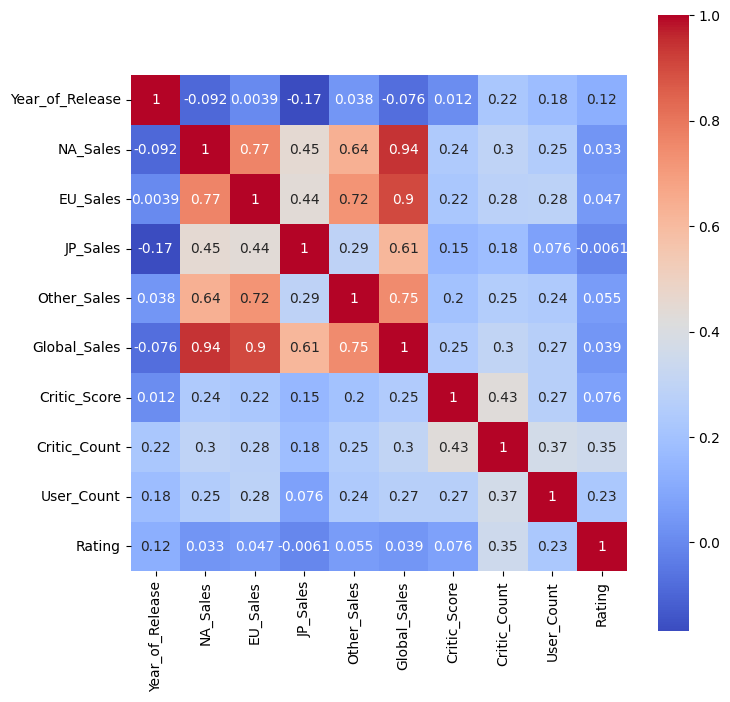

In [12]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 8))
sns.heatmap(video_games_df.corr(),  annot=True, square=True, cmap='coolwarm')
plt.show()